In [693]:
import pandas as pd


def combine_csv(demographics_file, performance_file, prevloans_file):
  # Read the CSV files
  demographics_df = pd.read_csv(demographics_file)
  performance_df = pd.read_csv(performance_file)
  prevloans_df = pd.read_csv(prevloans_file)

  # Merge demographics and performance data
  merged_df = pd.merge(demographics_df, performance_df, on='customerid', suffixes=('_current', '_previous'), how='outer')

  # Merge the merged DataFrame with previous loans data
  merged_df = pd.merge(merged_df, prevloans_df, on='customerid', suffixes=('_current', '_previous'), how='left')

  # Return the merged DataFrame
  return merged_df


demographics_file = 'traindemographics.csv'
performance_file = 'trainperf (1).csv'
prevloans_file = 'trainprevloans.csv'


# Combine the data
combined_data = combine_csv(demographics_file, performance_file, prevloans_file)


# Print the first few rows of the combined data
print(combined_data.head())

                         customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
4  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       5.746100      5.563174     Fidelity Bank   
4           Savings       5.746100      5.563174     Fidelity Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  \
0                 NaN                       NaN                        NaN   
1                 Na

In [694]:
customer_ids = combined_data['customerid']
# combined_data = combined_data.drop(columns=['customerid'])

In [695]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19281 entries, 0 to 19280
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  19281 non-null  object 
 1   birthdate                   14767 non-null  object 
 2   bank_account_type           14767 non-null  object 
 3   longitude_gps               14767 non-null  float64
 4   latitude_gps                14767 non-null  float64
 5   bank_name_clients           14767 non-null  object 
 6   bank_branch_clients         125 non-null    object 
 7   employment_status_clients   13249 non-null  object 
 8   level_of_education_clients  3611 non-null   object 
 9   systemloanid_current        18212 non-null  float64
 10  loannumber_current          18212 non-null  float64
 11  approveddate_current        18212 non-null  object 
 12  creationdate_current        18212 non-null  object 
 13  loanamount_current          182

In [824]:
print(combined_data['good_bad_flag'].head(10))

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
8     1.0
9     1.0
10    1.0
11    1.0
Name: good_bad_flag, dtype: float64


In [696]:
import pandas as pd

# Calculate the percentage of missing values in each column
missing_percentage = combined_data.isnull().mean() * 100

# Specify a threshold for the percentage of missing values above which you want to drop the column
threshold = 50  # Adjust this threshold as needed

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns from the DataFrame
combined_data = combined_data.drop(columns=columns_to_drop, axis=1)

print(combined_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19281 entries, 0 to 19280
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 19281 non-null  object 
 1   birthdate                  14767 non-null  object 
 2   bank_account_type          14767 non-null  object 
 3   longitude_gps              14767 non-null  float64
 4   latitude_gps               14767 non-null  float64
 5   bank_name_clients          14767 non-null  object 
 6   employment_status_clients  13249 non-null  object 
 7   systemloanid_current       18212 non-null  float64
 8   loannumber_current         18212 non-null  float64
 9   approveddate_current       18212 non-null  object 
 10  creationdate_current       18212 non-null  object 
 11  loanamount_current         18212 non-null  float64
 12  totaldue_current           18212 non-null  float64
 13  termdays_current           18212 non-null  flo

In [697]:
import pandas as pd
# Convert date columns to datetime format
date_columns = ['birthdate', 'approveddate_current', 'creationdate_current', 'approveddate_previous',
                'creationdate_previous', 'closeddate', 'firstduedate', 'firstrepaiddate']
combined_data[date_columns] = combined_data[date_columns].apply(pd.to_datetime)

# Convert categorical columns to categorical data type
categorical_columns = ['customerid','bank_account_type',
                       'bank_name_clients',
                      #  'bank_branch_clients',, 'level_of_education_clients','referredby_current','referredby_previous'
                       'employment_status_clients', 'good_bad_flag',]
combined_data[categorical_columns] = combined_data[categorical_columns].astype('category')

# Ensure numerical columns are represented in the appropriate data type
numerical_columns = ['longitude_gps', 'latitude_gps', 'systemloanid_current', 'loannumber_current',
                     'loanamount_current', 'totaldue_current', 'termdays_current', 'systemloanid_previous',
                     'loannumber_previous', 'loanamount_previous', 'totaldue_previous', 'termdays_previous']
combined_data[numerical_columns] = combined_data[numerical_columns].astype(float)

# Ensure systemloanid_previous, loannumber_previous, and other relevant columns are integers
combined_data['systemloanid_previous'] = combined_data['systemloanid_previous'].astype('Int64')
combined_data['loannumber_previous'] = combined_data['loannumber_previous'].astype('Int64')


# Check the data types after conversion
print(combined_data.dtypes)


customerid                         category
birthdate                    datetime64[ns]
bank_account_type                  category
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                  category
employment_status_clients          category
systemloanid_current                float64
loannumber_current                  float64
approveddate_current         datetime64[ns]
creationdate_current         datetime64[ns]
loanamount_current                  float64
totaldue_current                    float64
termdays_current                    float64
good_bad_flag                      category
systemloanid_previous                 Int64
loannumber_previous                   Int64
approveddate_previous        datetime64[ns]
creationdate_previous        datetime64[ns]
loanamount_previous                 float64
totaldue_previous                   float64
termdays_previous                   float64
closeddate                   dat

In [698]:
# Assuming 'combined_data' is your dataset and 'good_bad_flag' is the target variable
unique_values = combined_data['good_bad_flag'].unique()
print("Unique values in the target variable:", unique_values)


Unique values in the target variable: ['Good', 'Bad', NaN]
Categories (2, object): ['Bad', 'Good']


In [699]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
combined_data['bank_account_type'] = label_encoder.fit_transform(combined_data['bank_account_type'])
combined_data['bank_name_clients'] = label_encoder.fit_transform(combined_data['bank_name_clients'])
# combined_data['bank_branch_clients'] = label_encoder.fit_transform(combined_data['bank_branch_clients'])
combined_data['employment_status_clients'] = label_encoder.fit_transform(combined_data['employment_status_clients'])
# combined_data['level_of_education_clients'] = label_encoder.fit_transform(combined_data['level_of_education_clients'])
combined_data['good_bad_flag'] = label_encoder.fit_transform(combined_data['good_bad_flag'])
combined_data['customerid'] = label_encoder.fit_transform(combined_data['customerid'])
# combined_data['referredby_current'] = label_encoder.fit_transform(combined_data['referredby_current'])
combined_data['systemloanid_previous'] = label_encoder.fit_transform(combined_data['systemloanid_previous'])
# combined_data['referredby_previous'] = label_encoder.fit_transform(combined_data['referredby_previous'])

# Convert datetime variables to numerical representations (e.g., Unix timestamps)
combined_data['birthdate'] = combined_data['birthdate'].astype(int) / 10**9  # Convert to Unix timestamp
combined_data['approveddate_current'] = combined_data['approveddate_current'].astype(int) / 10**9
combined_data['creationdate_current'] = combined_data['creationdate_current'].astype(int) / 10**9
combined_data['approveddate_previous'] = combined_data['approveddate_previous'].astype(int) / 10**9
combined_data['creationdate_previous'] = combined_data['creationdate_previous'].astype(int) / 10**9
combined_data['closeddate'] = combined_data['closeddate'].astype(int) / 10**9
combined_data['firstduedate'] = combined_data['firstduedate'].astype(int) / 10**9
combined_data['firstrepaiddate'] = combined_data['firstrepaiddate'].astype(int) / 10**9

# # Check the updated data types
# print(combined_data.dtypes)


In [700]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19281 entries, 0 to 19280
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 19281 non-null  int64  
 1   birthdate                  19281 non-null  float64
 2   bank_account_type          19281 non-null  int64  
 3   longitude_gps              14767 non-null  float64
 4   latitude_gps               14767 non-null  float64
 5   bank_name_clients          19281 non-null  int64  
 6   employment_status_clients  19281 non-null  int64  
 7   systemloanid_current       18212 non-null  float64
 8   loannumber_current         18212 non-null  float64
 9   approveddate_current       19281 non-null  float64
 10  creationdate_current       19281 non-null  float64
 11  loanamount_current         18212 non-null  float64
 12  totaldue_current           18212 non-null  float64
 13  termdays_current           18212 non-null  flo

In [701]:
from sklearn.impute import SimpleImputer

# Define imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='median')  # Impute missing numerical values with median
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Impute missing categorical values with most frequent

# Separate numerical, categorical, and datetime features
numerical_features = combined_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = combined_data.select_dtypes(include=['category']).columns
datetime_features = combined_data.select_dtypes(include=['datetime64']).columns

# Impute missing values for numerical features
combined_data[numerical_features] = numerical_imputer.fit_transform(combined_data[numerical_features])

print(combined_data[categorical_features].isnull().sum())


# Impute missing values for datetime features (using forward-fill)
combined_data[datetime_features] = combined_data[datetime_features].ffill()

# Check for any remaining missing values
print(combined_data.isnull().sum())


Series([], dtype: float64)
customerid                   0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
systemloanid_current         0
loannumber_current           0
approveddate_current         0
creationdate_current         0
loanamount_current           0
totaldue_current             0
termdays_current             0
good_bad_flag                0
systemloanid_previous        0
loannumber_previous          0
approveddate_previous        0
creationdate_previous        0
loanamount_previous          0
totaldue_previous            0
termdays_previous            0
closeddate                   0
firstduedate                 0
firstrepaiddate              0
dtype: int64


In [702]:
# Assuming 'combined_data' is your dataset and 'good_bad_flag' is the target variable
unique_values = combined_data['good_bad_flag'].unique()
print("Unique values in the target variable:", unique_values)

Unique values in the target variable: [1. 0. 2.]


In [703]:
#filter out rows where the 'good_bad_flag' column is not equal to 2 2
combined_data = combined_data[combined_data['good_bad_flag'] != 2]


In [704]:
# Assuming 'combined_data' is your dataset and 'good_bad_flag' is the target variable
unique_values = combined_data['good_bad_flag'].unique()
print("Unique values in the target variable:", unique_values)


Unique values in the target variable: [1. 0.]


In [705]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features and target variable
X = combined_data.drop(columns=['good_bad_flag'])
y = combined_data['good_bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model before handling outliers
model_before = RandomForestClassifier()
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Accuracy before handling outliers:", accuracy_before)


Accuracy before handling outliers: 0.9404337084820203


In [706]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [707]:
# Select numerical columns for outlier detection
numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

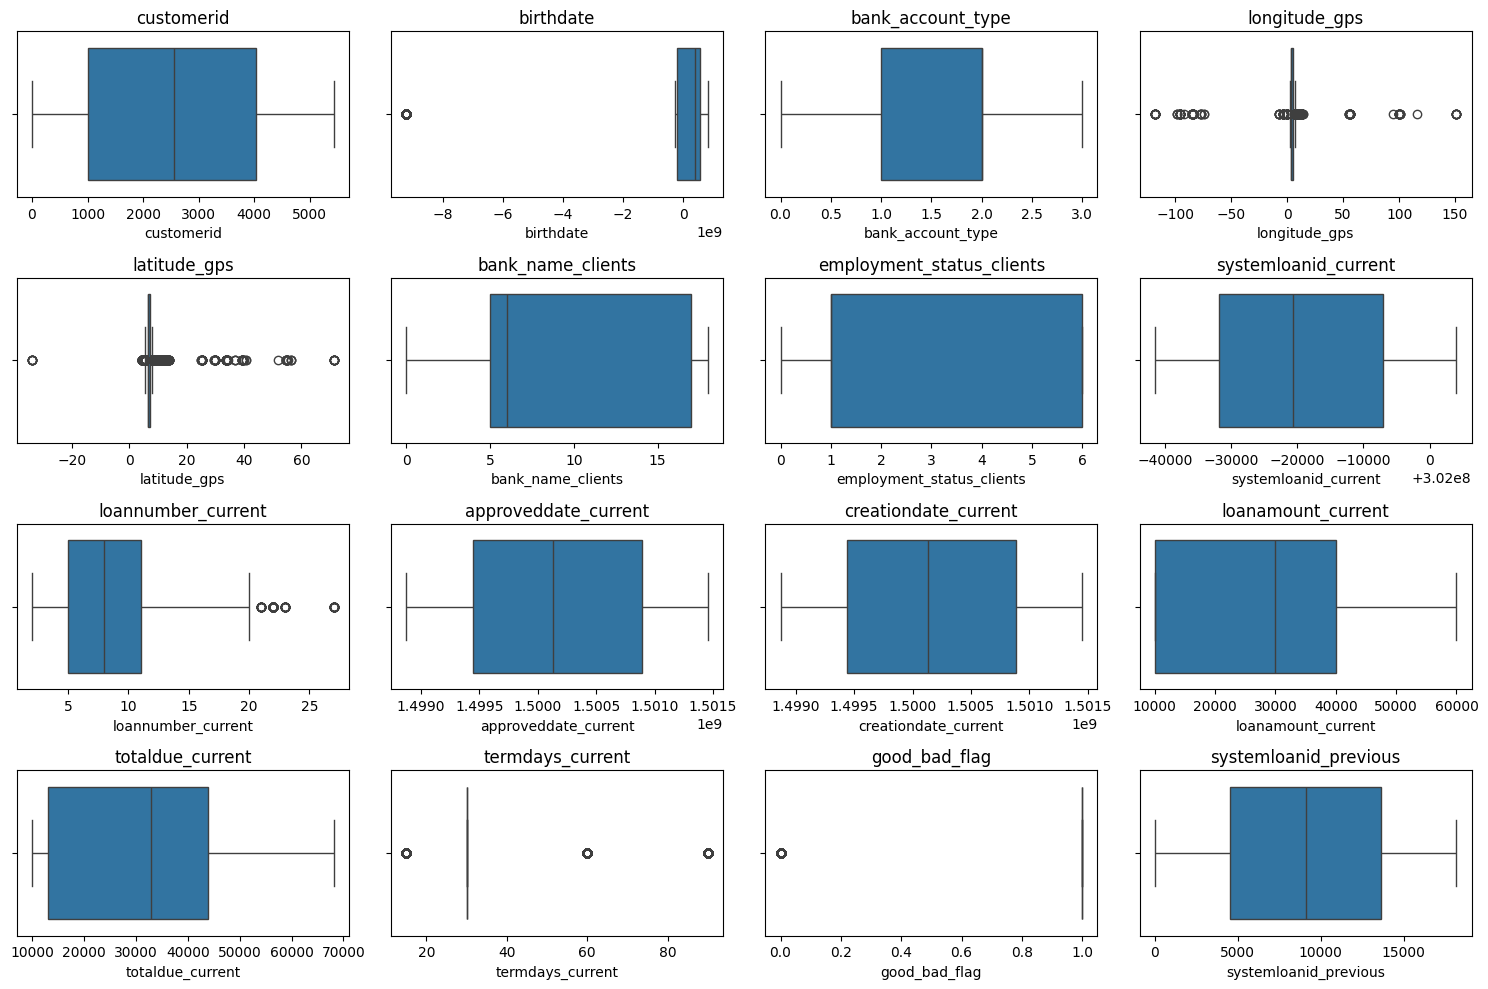

In [708]:
# Visual inspection: box plots for numerical columns
plt.figure(figsize=(15, 10))
for i in range(1, min(len(numerical_columns) + 1, 17)):
    plt.subplot(4, 4, i)
    sns.boxplot(x=combined_data[numerical_columns[i-1]])
    plt.title(numerical_columns[i-1])
plt.tight_layout()
plt.show()

In [709]:
# Statistical methods: identify outliers based on IQR
outlier_indices = []
for column in numerical_columns:
    Q1 =combined_data[column].quantile(0.25)
    Q3 = combined_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = combined_data[(combined_data[column] < lower_bound) | (combined_data[column] > upper_bound)]
    outlier_indices.extend(outliers.index)


In [710]:
# Capture  outlier indices
outlier_indices = list(set(outlier_indices))

In [711]:
# Handle outliers
def average_outliers(df, outlier_indices):
  # Group outliers by their values
  outlier_groups = {}
  for i in outlier_indices:
    value = df.loc[i][0]
    if value not in outlier_groups:
      outlier_groups[value] = []
    outlier_groups[value].append(i)

  # Calculate the average for each group of outliers
  for value, indices in outlier_groups.items():
    average = sum(df.loc[i] for i in indices) / len(indices)
    for i in indices:
      df.loc[i] = average

  return df

df_cleaned = average_outliers(combined_data, outlier_indices)

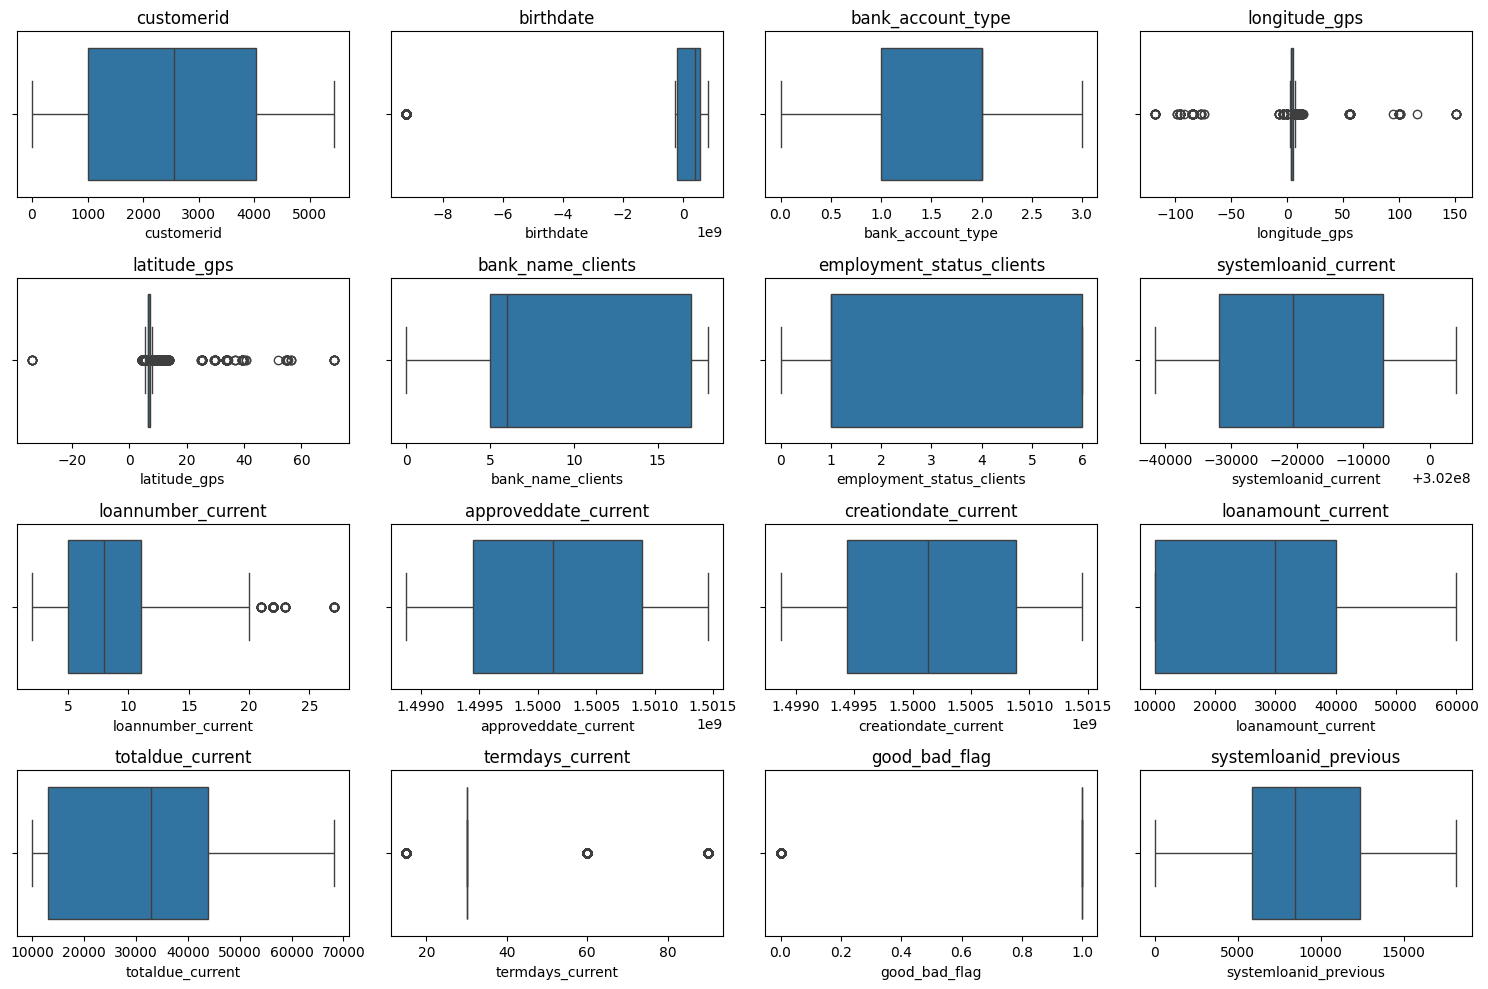

In [712]:
# Visual inspection: box plots for numerical columns
plt.figure(figsize=(15, 10))
for i in range(1, min(len(numerical_columns) + 1, 17)):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_cleaned[numerical_columns[i-1]])
    plt.title(numerical_columns[i-1])
plt.tight_layout()
plt.show()

In [713]:
# # Visual inspection: box plots for numerical columns
# plt.figure(figsize=(15, 10))
# for i in range(1, min(len(numerical_columns) + 1, 17)):
#     plt.subplot(4, 4, i)
#     sns.boxplot(x=df_cleaned[numerical_columns[i-1]])
#     plt.title(numerical_columns[i-1])
# plt.tight_layout()
# plt.show()

In [714]:
# Check the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)

Shape of the cleaned dataset: (18212, 25)


In [715]:
# Split data into features and target variable
X = df_cleaned.drop(columns=['good_bad_flag'])
y = df_cleaned['good_bad_flag']

In [716]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [717]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [718]:
model_after = RandomForestClassifier()
model_after.fit(X_train_scaled, y_train)
y_pred_after = model_after.predict(X_test_scaled)
accuracy_after = accuracy_score(y_test, y_pred_after)
print(model_after.score(X_test_scaled,y_test))


0.9751098096632503


In [719]:
print("Accuracy before handling missing values:", accuracy_before)
print("Accuracy after handling missing values and outliers:", accuracy_after)

Accuracy before handling missing values: 0.9404337084820203
Accuracy after handling missing values and outliers: 0.9751098096632503


In [720]:
# Check for data leakage by ensuring that there's no overlap between training and testing indices
train_indices = set(X_train.index)
test_indices = set(X_test.index)
intersection = train_indices.intersection(test_indices)
if intersection:
    print("Data leakage detected! Overlapping indices between training and testing data.")
else:
    print("No data leakage detected.")

No data leakage detected.


Class distribution:
good_bad_flag
1.0    14840
0.0     3372
Name: count, dtype: int64


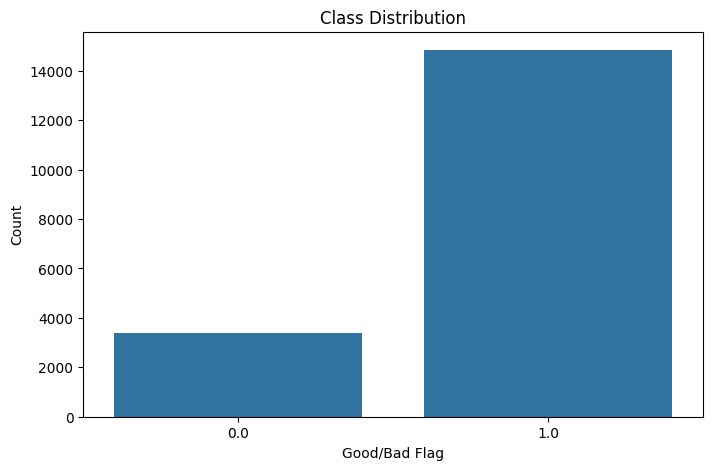

In [721]:
# Check class distribution of the target variable
class_distribution = df_cleaned['good_bad_flag'].value_counts()
print("Class distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='good_bad_flag', data=df_cleaned)
plt.title('Class Distribution')
plt.xlabel('Good/Bad Flag')
plt.ylabel('Count')
plt.show()

In [722]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision
precision = precision_score(y_test, y_pred_after,average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_after, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_after, average='micro')
print("F1-score:", f1)



Precision: 0.9751098096632503
Recall: 0.9751098096632503
F1-score: 0.9751098096632503


In [723]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_lr = model_lr.predict(X_test_scaled)
print("Classification report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       987
         1.0       0.82      1.00      0.90      4477

    accuracy                           0.82      5464
   macro avg       0.91      0.50      0.45      5464
weighted avg       0.85      0.82      0.74      5464



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [724]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_lr, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_lr, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_lr, average='micro')
print("F1-score:", f1)



Accuracy: 0.8197291361639825
Precision: 0.8197291361639825
Recall: 0.8197291361639825
F1-score: 0.8197291361639825


In [725]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/10
319/319 [==============================] - 2s 4ms/step - loss: 0.4817 - accuracy: 0.7992 - val_loss: 0.4212 - val_accuracy: 0.8302
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.4380 - accuracy: 0.8085 - val_loss: 0.3976 - val_accuracy: 0.8298
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8154 - val_loss: 0.3872 - val_accuracy: 0.8333
Epoch 4/10
319/319 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8213 - val_loss: 0.3741 - val_accuracy: 0.8435
Epoch 5/10
319/319 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8317 - val_loss: 0.3548 - val_accuracy: 0.8486
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8363 - val_loss: 0.3510 - val_accuracy: 0.8576
Epoch 7/10
319/319 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8428 - val_loss: 0.3458 - val_accuracy: 0.8557
Epoch 

In [726]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [727]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1-score:", f1)



Accuracy: 0.8294289897510981
Precision: 0.8294289897510981
Recall: 0.8294289897510981
F1-score: 0.8294289897510981


In [798]:
def combine_csv(demographics_file, performance_file, prevloans_file):
  # Read the CSV files
  demographics_df = pd.read_csv(demographics_file)
  performance_df = pd.read_csv(performance_file)
  prevloans_df = pd.read_csv(prevloans_file)

  # Merge demographics and performance data
  merged_df = pd.merge(demographics_df, performance_df, on='customerid', suffixes=('_current', '_previous'), how='outer')

  # Merge the merged DataFrame with previous loans data
  merged_df = pd.merge(merged_df, prevloans_df, on='customerid', suffixes=('_current', '_previous'), how='left')

  # Return the merged DataFrame
  return merged_df


demographics_file = '/content/testdemographics (1).csv'
performance_file = '/content/testperf.csv'
prevloans_file = '/content/testprevloans.csv'


# Combine the data
combined_test_data = combine_csv(demographics_file, performance_file, prevloans_file)


# Print the first few rows of the combined data
print(combined_test_data.head())

                         customerid                   birthdate  \
0  8a858f305c8dd672015c93b1db645db4  1976-08-28 00:00:00.000000   
1  8a858f085a477386015a47fb049e49ca  1978-06-23 00:00:00.000000   
2  8a858e6f5cd5e874015cd6f5634c39ad  1984-04-04 00:00:00.000000   
3  8a858e9d5bfd7037015bfdab79f61305  1983-05-28 00:00:00.000000   
4  8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       5.296628      7.593965     Heritage Bank   
1           Savings       3.294513      6.596602               UBA   
2           Savings       8.501912      7.729364        First Bank   
3           Savings       3.318904      6.681595               UBA   
4           Savings       6.354624      4.949031        First Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  \
0                 NaN                 Permanent                        NaN   
1                 Na

In [799]:
customer_test_ids = combined_test_data['customerid']
# combined_test_data = combined_test_data.drop(columns=['customerid'])

In [800]:
print(combined_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  7017 non-null   object 
 1   birthdate                   2708 non-null   object 
 2   bank_account_type           2708 non-null   object 
 3   longitude_gps               2708 non-null   float64
 4   latitude_gps                2708 non-null   float64
 5   bank_name_clients           2708 non-null   object 
 6   bank_branch_clients         29 non-null     object 
 7   employment_status_clients   2398 non-null   object 
 8   level_of_education_clients  549 non-null    object 
 9   systemloanid_current        5915 non-null   float64
 10  loannumber_current          5915 non-null   float64
 11  approveddate_current        5915 non-null   object 
 12  creationdate_current        5915 non-null   object 
 13  loanamount_current          5915 

In [801]:
import pandas as pd


# Calculate the percentage of missing values in each column
missing_percentage = combined_test_data.isnull().mean() * 100

# Specify a threshold for the percentage of missing values above which you want to drop the column
threshold = 90  # Adjust this threshold as needed

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns from the DataFrame
combined_test_data = combined_test_data.drop(columns=columns_to_drop, axis=1)


print(combined_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7017 non-null   object 
 1   birthdate                  2708 non-null   object 
 2   bank_account_type          2708 non-null   object 
 3   longitude_gps              2708 non-null   float64
 4   latitude_gps               2708 non-null   float64
 5   bank_name_clients          2708 non-null   object 
 6   employment_status_clients  2398 non-null   object 
 7   systemloanid_current       5915 non-null   float64
 8   loannumber_current         5915 non-null   float64
 9   approveddate_current       5915 non-null   object 
 10  creationdate_current       5915 non-null   object 
 11  loanamount_current         5915 non-null   float64
 12  totaldue_current           5915 non-null   float64
 13  termdays_current           5915 non-null   float

In [802]:
import pandas as pd
# Convert date columns to datetime format
date_test_columns = [
    'birthdate',
    'approveddate_current', 'creationdate_current', 'approveddate_previous',
                'creationdate_previous', 'closeddate', 'firstduedate', 'firstrepaiddate']
for column in date_test_columns:
    combined_test_data[column] = pd.to_datetime(combined_test_data[column], errors='coerce')

# Convert categorical columns to categorical data type
categorical_test_columns = ['customerid',
                            # 'bank_account_type', 'bank_name_clients', 'bank_branch_clients','employment_status_clients', 'level_of_education_clients','referredby_current','referredby_previous'
                            ]
combined_test_data[categorical_test_columns] = combined_test_data[categorical_test_columns].astype('category')

'bank_account_type', 'bank_name_clients', 'bank_branch_clients', 'employment_status_clients', 'level_of_education_clients', 'referredby_current', 'referredby_previous'
# Ensure numerical columns are represented in the appropriate data type
numerical_test_columns = [
    # 'longitude_gps', 'latitude_gps',
    'systemloanid_current', 'loannumber_current',
                     'loanamount_current', 'totaldue_current', 'termdays_current', 'systemloanid_previous',
                     'loannumber_previous', 'loanamount_previous', 'totaldue_previous', 'termdays_previous']
combined_test_data[numerical_test_columns] = combined_test_data[numerical_test_columns].astype(float)

# Ensure systemloanid_previous, loannumber_previous, and other relevant columns are integers
combined_test_data['systemloanid_previous'] = combined_test_data['systemloanid_previous'].astype('Int64')
combined_test_data['loannumber_previous'] = combined_test_data['loannumber_previous'].astype('Int64')


# Check the data types after conversion
print(combined_test_data.dtypes)


<ipython-input-802-157d6c3c9524>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_test_data[column] = pd.to_datetime(combined_test_data[column], errors='coerce')
<ipython-input-802-157d6c3c9524>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_test_data[column] = pd.to_datetime(combined_test_data[column], errors='coerce')


customerid                         category
birthdate                    datetime64[ns]
bank_account_type                    object
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                    object
employment_status_clients            object
systemloanid_current                float64
loannumber_current                  float64
approveddate_current         datetime64[ns]
creationdate_current         datetime64[ns]
loanamount_current                  float64
totaldue_current                    float64
termdays_current                    float64
systemloanid_previous                 Int64
loannumber_previous                   Int64
approveddate_previous        datetime64[ns]
creationdate_previous        datetime64[ns]
loanamount_previous                 float64
totaldue_previous                   float64
termdays_previous                   float64
closeddate                   datetime64[ns]
firstduedate                 dat

In [803]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
combined_test_data['bank_account_type'] = label_encoder.fit_transform(combined_test_data['bank_account_type'])
combined_test_data['bank_name_clients'] = label_encoder.fit_transform(combined_test_data['bank_name_clients'])
# combined_test_data['bank_branch_clients'] = label_encoder.fit_transform(combined_test_data['bank_branch_clients'])
combined_test_data['employment_status_clients'] = label_encoder.fit_transform(combined_test_data['employment_status_clients'])
# combined_test_data['level_of_education_clients'] = label_encoder.fit_transform(combined_test_data['level_of_education_clients'])
# combined_data['good_bad_flag'] = label_encoder.fit_transform(combined_data['good_bad_flag'])
combined_test_data['customerid'] = label_encoder.fit_transform(combined_test_data['customerid'])
# combined_test_data['referredby_current'] = label_encoder.fit_transform(combined_test_data['referredby_current'])
combined_test_data['systemloanid_previous'] = label_encoder.fit_transform(combined_test_data['systemloanid_previous'])
# combined_test_data['referredby_previous'] = label_encoder.fit_transform(combined_test_data['referredby_previous'])

# Convert datetime variables to numerical representations (e.g., Unix timestamps)
combined_test_data['birthdate'] = combined_test_data['birthdate'].astype(int) / 10**9  # Convert to Unix timestamp
combined_test_data['approveddate_current'] = combined_test_data['approveddate_current'].astype(int) / 10**9
combined_test_data['creationdate_current'] = combined_test_data['creationdate_current'].astype(int) / 10**9
combined_test_data['approveddate_previous'] = combined_test_data['approveddate_previous'].astype(int) / 10**9
combined_test_data['creationdate_previous'] = combined_test_data['creationdate_previous'].astype(int) / 10**9
combined_test_data['closeddate'] = combined_test_data['closeddate'].astype(int) / 10**9
combined_test_data['firstduedate'] = combined_test_data['firstduedate'].astype(int) / 10**9
combined_test_data['firstrepaiddate'] = combined_test_data['firstrepaiddate'].astype(int) / 10**9

# Check the updated data types
print(combined_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7017 non-null   int64  
 1   birthdate                  7017 non-null   float64
 2   bank_account_type          7017 non-null   int64  
 3   longitude_gps              2708 non-null   float64
 4   latitude_gps               2708 non-null   float64
 5   bank_name_clients          7017 non-null   int64  
 6   employment_status_clients  7017 non-null   int64  
 7   systemloanid_current       5915 non-null   float64
 8   loannumber_current         5915 non-null   float64
 9   approveddate_current       7017 non-null   float64
 10  creationdate_current       7017 non-null   float64
 11  loanamount_current         5915 non-null   float64
 12  totaldue_current           5915 non-null   float64
 13  termdays_current           5915 non-null   float

In [804]:
from sklearn.impute import SimpleImputer

# Define imputers for numerical and categorical features
numerical_test_imputer = SimpleImputer(strategy='median')  # Impute missing numerical values with median
categorical_test_imputer = SimpleImputer(strategy='most_frequent')  # Impute missing categorical values with most frequent

# Separate numerical, categorical, and datetime features
numerical_features = combined_test_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = combined_test_data.select_dtypes(include=['category']).columns
datetime_features = combined_test_data.select_dtypes(include=['datetime64']).columns

# Impute missing values for numerical features
combined_test_data[numerical_features] = numerical_test_imputer.fit_transform(combined_test_data[numerical_features])

print(combined_test_data[categorical_features].isnull().sum())


# Impute missing values for datetime features (using forward-fill)
combined_test_data[datetime_features] = combined_test_data[datetime_features].ffill()

# Check for any remaining missing values
print(combined_test_data.isnull().sum())


Series([], dtype: float64)
customerid                   0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
systemloanid_current         0
loannumber_current           0
approveddate_current         0
creationdate_current         0
loanamount_current           0
totaldue_current             0
termdays_current             0
systemloanid_previous        0
loannumber_previous          0
approveddate_previous        0
creationdate_previous        0
loanamount_previous          0
totaldue_previous            0
termdays_previous            0
closeddate                   0
firstduedate                 0
firstrepaiddate              0
dtype: int64


In [805]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combined_data' is your DataFrame containing all the data
numeric_test_columns = combined_test_data.select_dtypes(include=['float64', 'int64']).columns

# Descriptive statistics
print(combined_test_data[numeric_test_columns].describe())



        customerid     birthdate  bank_account_type  longitude_gps  \
count  7017.000000  7.017000e+03        7017.000000    7017.000000   
mean   1183.042468 -5.483989e+09           2.488385       3.793157   
std     790.542808  4.718996e+09           0.714456       5.045023   
min       0.000000 -9.223372e+09           0.000000    -149.033700   
25%     416.000000 -9.223372e+09           2.000000       3.605160   
50%    1170.000000 -9.223372e+09           3.000000       3.605160   
75%    1867.000000  4.226688e+08           3.000000       3.605160   
max    2548.000000  8.269344e+08           3.000000      39.815590   

       latitude_gps  bank_name_clients  employment_status_clients  \
count   7017.000000        7017.000000                7017.000000   
mean       6.898324          13.470286                   4.478837   
std        2.622372           6.375620                   2.197396   
min      -74.005974           0.000000                   0.000000   
25%        6.631291     

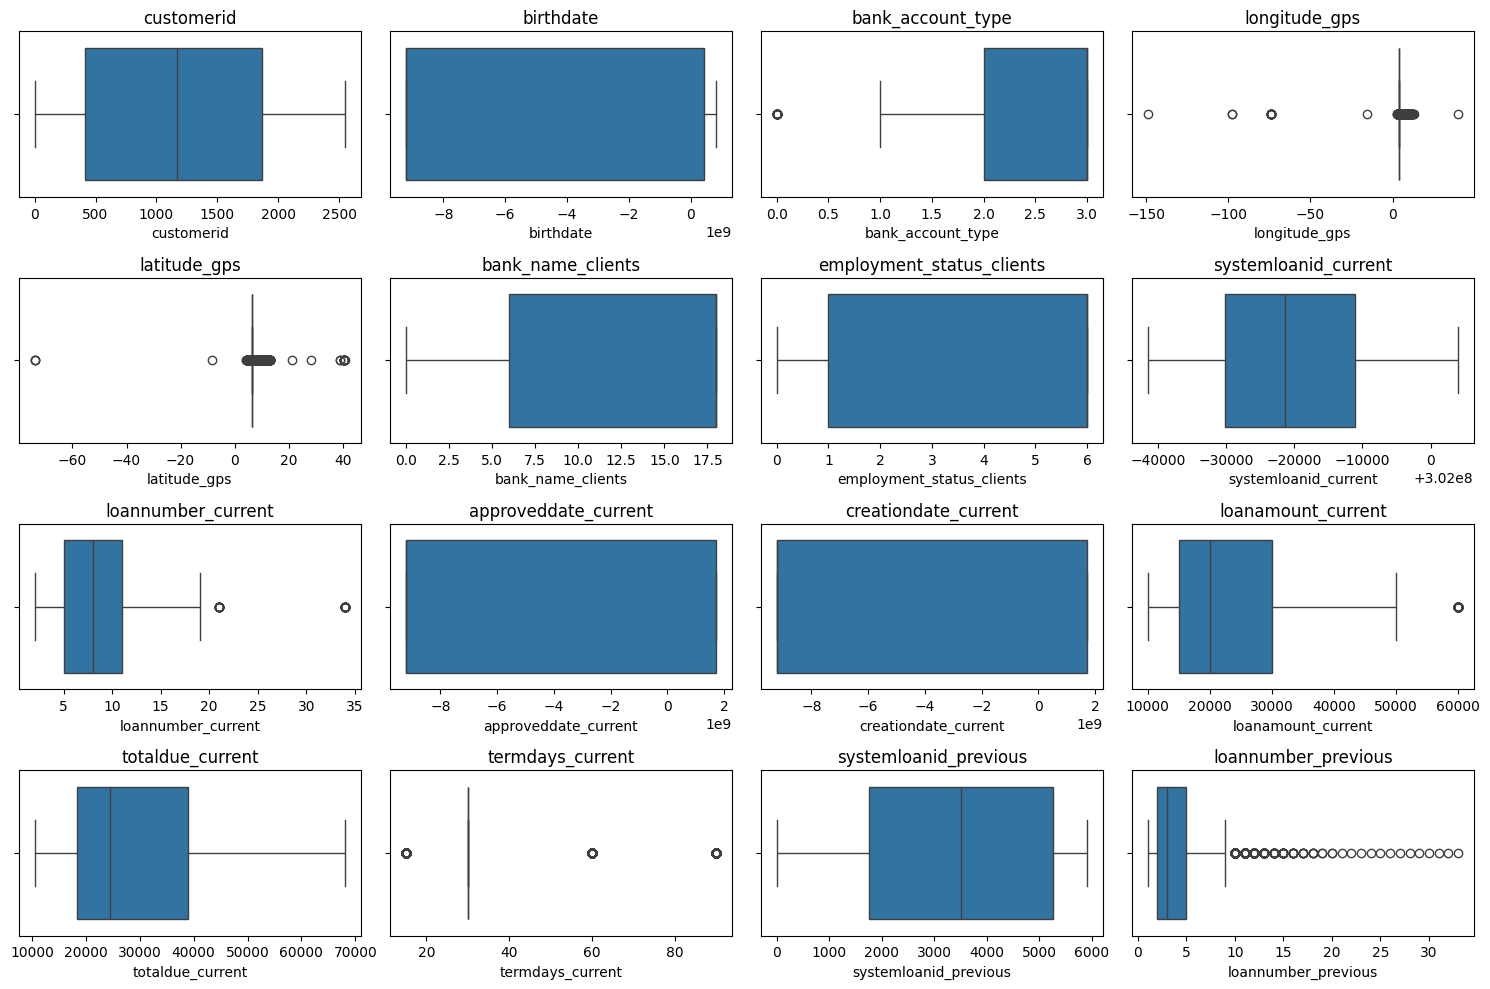

In [806]:
# Visual inspection: box plots for numerical columns
numerical_test_columns = combined_test_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i in range(1, min(len(numerical_test_columns) + 1, 17)):
    plt.subplot(4, 4, i)
    sns.boxplot(x=combined_test_data[numerical_test_columns[i-1]])
    plt.title(numerical_test_columns[i-1])
plt.tight_layout()
plt.show()

In [807]:
# Statistical methods: identify outliers based on IQR
outlier_test_indices = []
for column in numerical_test_columns:
    Q1 =combined_test_data[column].quantile(0.25)
    Q3 = combined_test_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = combined_test_data[(combined_test_data[column] < lower_bound) | (combined_test_data[column] > upper_bound)]
    outlier_indices.extend(outliers.index)


In [808]:
# Handle outliers
# Capture  outlier indices
outlier_test_indices = list(set(outlier_test_indices))
def average_outliers(df, outlier_test_indices):
  # Group outliers by their values
  outlier_groups = {}
  for i in outlier_test_indices:
    value = df.loc[i][0]
    if value not in outlier_groups:
      outlier_groups[value] = []
    outlier_groups[value].append(i)

  # Calculate the average for each group of outliers
  for value, indices in outlier_groups.items():
    average = sum(df.loc[i] for i in indices) / len(indices)
    for i in indices:
      df.loc[i] = average

  return df

df_cleaned = average_outliers(combined_test_data, outlier_test_indices)

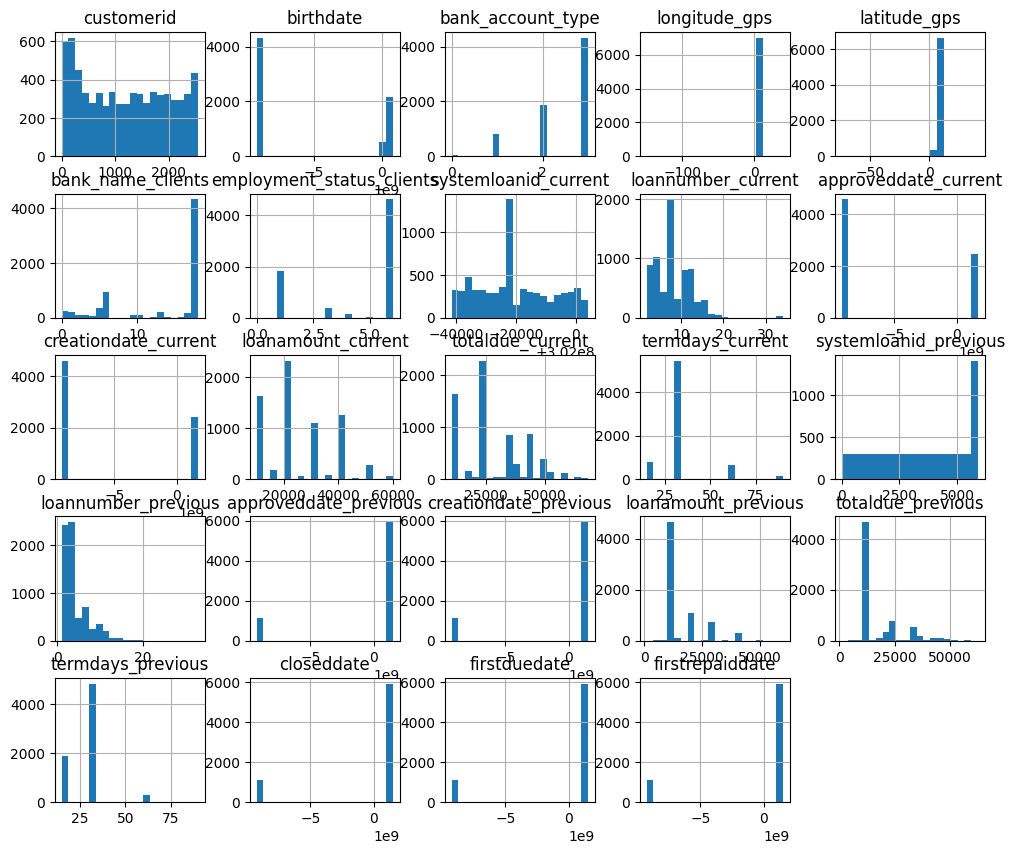

In [809]:
# Histograms
df_cleaned[numeric_test_columns].hist(bins=20, figsize=(12, 10))
plt.show()

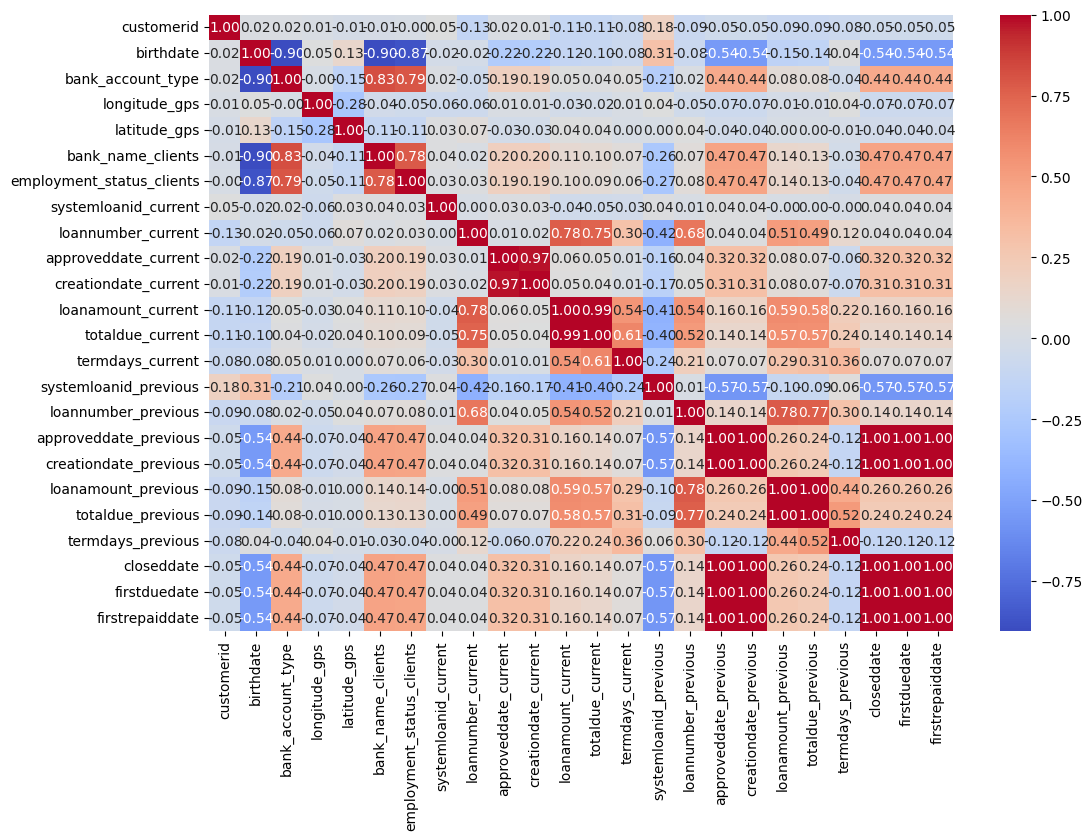

In [810]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numeric_test_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [811]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           customerid  birthdate  bank_account_type  \
customerid                   1.000000   0.021058           0.022673   
birthdate                    0.021058   1.000000          -0.903227   
bank_account_type            0.022673  -0.903227           1.000000   
longitude_gps                0.005322   0.046632          -0.000895   
latitude_gps                -0.012255   0.130848          -0.153616   
bank_name_clients           -0.009078  -0.896271           0.827049   
employment_status_clients   -0.002216  -0.873173           0.794303   
systemloanid_current         0.046239  -0.021643           0.022223   
loannumber_current          -0.126514  -0.024743          -0.052085   
approveddate_current         0.015801  -0.220354           0.193352   
creationdate_current         0.013737  -0.219112           0.192703   
loanamount_current          -0.109855  -0.115898           0.048225   
totaldue_current            -0.110021  -0.102909         

In [812]:
# Define a threshold for correlation
threshold = 0.25

# Create an empty list to store correlated feature pairs
correlated_features = []
non_correlated_features = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  # Avoid duplicate pairs and self-correlation
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
        else:
            non_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the correlated feature pairs
print("Correlated Features:")
for feature1, feature2 in correlated_features:
    print(f"Correlated features: {feature1}, {feature2}, Correlation coefficient: {correlation_matrix.loc[feature1, feature2]}")

# Print the non-correlated feature pairs
print("\nNon-correlated Features:")
for feature1, feature2 in non_correlated_features:
    print(f"Non-correlated features: {feature1}, {feature2}, Correlation coefficient: {correlation_matrix.loc[feature1, feature2]}")


Correlated Features:
Correlated features: birthdate, bank_account_type, Correlation coefficient: -0.9032268859636166
Correlated features: birthdate, bank_name_clients, Correlation coefficient: -0.8962714752082565
Correlated features: birthdate, employment_status_clients, Correlation coefficient: -0.8731727962061223
Correlated features: birthdate, systemloanid_previous, Correlation coefficient: 0.3085627754840732
Correlated features: birthdate, approveddate_previous, Correlation coefficient: -0.5396707367956031
Correlated features: birthdate, creationdate_previous, Correlation coefficient: -0.5396707320201214
Correlated features: birthdate, closeddate, Correlation coefficient: -0.5396714464451207
Correlated features: birthdate, firstduedate, Correlation coefficient: -0.5396714719001365
Correlated features: birthdate, firstrepaiddate, Correlation coefficient: -0.539669444955887
Correlated features: bank_account_type, bank_name_clients, Correlation coefficient: 0.8270490052900342
Correlat

In [813]:
# Select relevant features
test_dataset_features = df_cleaned.iloc[:, :28]  # Use the same features used for training

# Make predictions
predictions = model_after.predict(test_dataset_features)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [814]:
print(predictions)

[1. 0. 0. ... 1. 1. 1.]


In [817]:
df_cleaned['good_bad_flag'] = predictions


In [820]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'good_bad_flag' is the name of your target variable in the combined test data
actual_labels = combined_test_data['good_bad_flag']


# # Calculate accuracy
# accuracy = accuracy_score(actual_labels, predictions)

# # Calculate precision
# precision = precision_score(actual_labels, predictions)

# # Calculate recall
# recall = recall_score(actual_labels, predictions)

# # Calculate F1-score
# f1 = f1_score(actual_labels, predictions)

# # Print the scores
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)


In [822]:
import pandas as pd

# Create a new DataFrame with original data and predictions
predictions_df = pd.DataFrame({'customerid': customer_test_ids,  # Replace 'Column1' with actual column names,

                               'good_bad_flag': predictions})

# Display the DataFrame
print(predictions_df)


                            customerid  good_bad_flag
0     8a858f305c8dd672015c93b1db645db4            1.0
1     8a858f085a477386015a47fb049e49ca            0.0
2     8a858e6f5cd5e874015cd6f5634c39ad            0.0
3     8a858e9d5bfd7037015bfdab79f61305            0.0
4     8a858fde56eb02280156eb6dafc128ac            1.0
...                                ...            ...
7012  8a858f605b911d60015b91b99d55400d            1.0
7013  8a858f605b911d60015b91b99d55400d            1.0
7014  8a858f605b911d60015b91b99d55400d            1.0
7015  8a858f605b911d60015b91b99d55400d            1.0
7016  8a858f605b911d60015b91b99d55400d            1.0

[7017 rows x 2 columns]


In [787]:
predictions_df.to_csv('sample_results.csv', index=False)


In [788]:
from google.colab import files
files.download('sample_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>